# Course Description
Machine learning is the field that teaches machines and computers to learn from existing data to make predictions on new data: <br>Will a tumor be benign or malignant? </br>
<br>Which of your customers will take their business elsewhere?</br> 
<br>Is a particular email spam?</br> 
<br>In this course, you'll learn how to use Python to perform supervised learning, an essential component of machine learning. You'll learn how to build predictive models, tune their parameters, and determine how well they will perform with unseen data—all while using real world datasets. You'll be using scikit-learn, one of the most popular and user-friendly machine learning libraries for Python.</br>
### Instructor
1. Hugo Bowne-Anderson
2. Andreas Muller
3. Yashas Roy

# Module 1. Classification
In this chapter, you will be introduced to classification problems and learn how to solve them using supervised learning techniques. And you’ll apply what you learn to a political dataset, where you classify the party affiliation of United States congressmen based on their voting records.

### Machine Learning
Machine Learning is a field of study that gives computers the ability to learn from data and make decision without being explicitly programmed.

**Example**
* Learning to predict whether an email is spam or not
* Clustering wikipedia entries into dierent categories

### Supervised Learning
* Uses labeled data which means input output pair is given

### Unsupervised Learning
* Uses unlabeled data.
* Uncovers hidden paerns from unlabeled data.

**Example**
* Grouping customers into distinct categories (Clustering)

### Reinforcement learning
* Draws inspiration from behavioral psychology
* Sowtware agents interact with an environment and learns how to optimize their behavior given a system of rewards and punishments.
#### Applications
* Economics
* Genetics
* Game playing
* AlphaGo: First computer to defeat the world champion in Go.

### Supervised learning
* **Predictor variables**/features and a target variable
* **Aim:** Predict the target variable, given the predictor variables
    * **Classication:** Target variable consists of categories
    * **Regression:** Target variable is continuous

#### Application
* Automate time-consuming or expensive manual tasks
    * **Example:** Doctor’s diagnosis
* Make predictions about the future
    * **Example:** Will a customer click on an ad or not?
    
#### Example
1. Using labeled financial data to predict whether the value of a stock will go up or go down next week. **Classification**
2. Using labeled housing price data to predict the price of a new house based on various features. **Regression**
3. Using unlabeled data to cluster the students of an online education company into different categories based on their learning styles. **Clustering**
4. Using labeled financial data to predict what the value of a stock will be next week. **Regression**
 
### Naming conventions
* Features = predictor variables = independent variables
* Target variable = dependent variable = response variable

### Exploratory data analysis

In [191]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, roc_curve
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import mglearn
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [2]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris_df = pd.DataFrame(data = load_iris().data, columns = load_iris().feature_names)
iris_df['species'] = load_iris().target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# dataset dimension
iris_df.shape

(150, 5)

In [5]:
# Prepare data
X_iris, y_iris = load_iris().data, load_iris().target

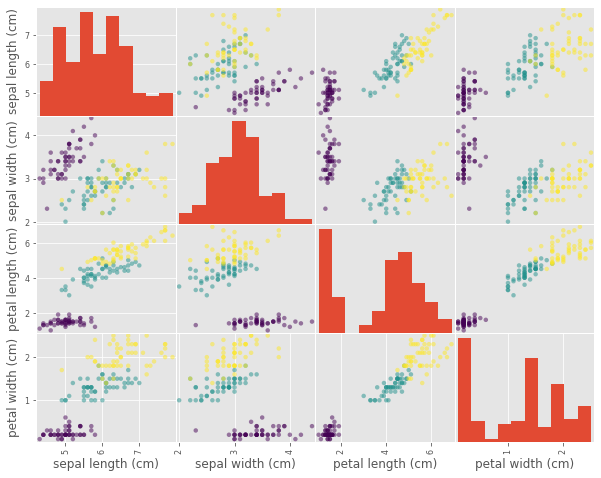

In [6]:
pd.plotting.scatter_matrix(iris_df.iloc[:,:-1], c = y_iris, figsize = [10, 8], s = 20, marker = 'o')
plt.show()

### Inference
1. Petal width and Petal length are highly correlated
2. The data is clustered based on the species

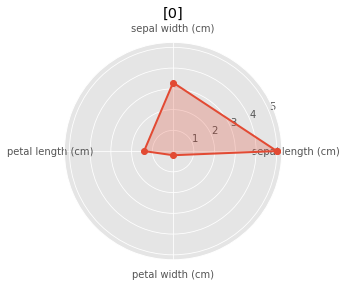

In [7]:
# Radar Plot
labels = np.array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'])
stats = iris_df.loc[49, labels].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.show()
ax = plt.subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:4], labels)
ax.set_title([iris_df.loc[49,"species"]])
ax.grid(True)

### k-Nearest Neighbors
Basic idea: Predict the label of a data point by looking at the ‘k’ closest labeled data points and taking a majority vote.

#### Scikit-learn fit and predict
1. All machine learning models implemented as Python classes
    * They implement the algorithms for learning and predicting
    * Store the information learned from the data
2. Training a model on the data =‘fitting’ a model to the data
    * .fit() method
3. To predict the labels of new data: .predict() method

In [8]:
# Split the data into train and test
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size = 0.3,
                                                                        random_state = 10, stratify = y_iris)

In [9]:
# instantiate the KNN classifier
knn_iris = KNeighborsClassifier(n_neighbors=3)
knn_iris.fit(X_train_iris, y_train_iris)

KNeighborsClassifier(n_neighbors=3)

In [10]:
X_new_iris = np.array([[5.6, 2.8, 3.9, 1.1],[5.7, 2.6, 3.8, 1.3],[4.7, 3.2, 1.3, 0.2]])
prediction = knn_iris.predict(X_new_iris)

# Accuracy on test dataset
y_pred_iris = knn_iris.predict(X_test_iris)
print('Prediction: {}'.format(prediction))
print("Accuracy: ", accuracy_score(y_test_iris, knn_iris.predict(X_test_iris))*100)

Prediction: [1 1 0]
Accuracy:  100.0


#### Plot decision Boundary

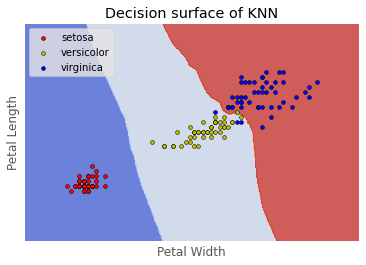

In [11]:
n_classes = 3
plot_colors = "ryb"
target_names = load_iris().target_names

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = KNeighborsClassifier(n_neighbors=6)
clf = model.fit(X_iris[:,2:], y_iris)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of KNN')
# Set-up grid for plotting.
X0, X1 = X_iris[:, 2], X_iris[:, 3]
xx, yy = make_meshgrid(X0, X1)

        
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_iris == i)
    plt.scatter(X_iris[idx, 2], X_iris[idx, 3], c=color, label=target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    
ax.set_ylabel('Petal Length')
ax.set_xlabel('Petal Width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

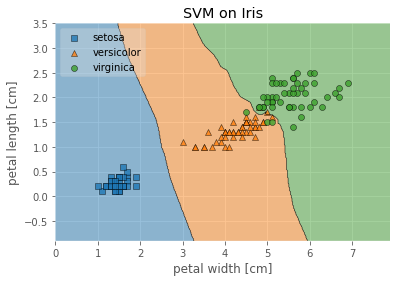

In [12]:
# Reference - http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
# Reference - http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/ 
X_petal = X_iris[:, 2:]

# Training a classifier
knn_iris_plot = KNeighborsClassifier(n_neighbors=6)
knn_iris_plot.fit(X_petal, y_iris)


# Plotting decision regions
ax = plot_decision_regions(X_petal, y_iris, clf=knn_iris_plot, legend=0)

# Adding axes annotations
plt.xlabel('petal width [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['setosa', 'versicolor', 'virginica'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

### Model complexity
* Larger k = smoother decision boundary = less complex model
* Smaller k = more complex model = can lead to overfitting

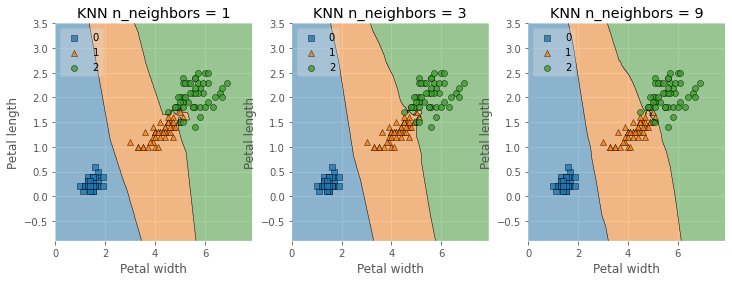

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

fig = plot_decision_regions(X=X_petal, y=y_iris, clf=KNeighborsClassifier(n_neighbors=1).fit(X_petal, y_iris), 
                            ax=axes[0], legend=2)
fig.set_title("KNN n_neighbors = 1")
fig.set_xlabel("Petal width")
fig.set_ylabel("Petal length")

fig = plot_decision_regions(X=X_petal, y=y_iris, clf=KNeighborsClassifier(n_neighbors=3).fit(X_petal, y_iris), 
                            ax=axes[1], legend=2)
fig.set_title("KNN n_neighbors = 3")
fig.set_xlabel("Petal width")
fig.set_ylabel("Petal length")

fig = plot_decision_regions(X=X_petal, y=y_iris, clf=KNeighborsClassifier(n_neighbors=9).fit(X_petal, y_iris), 
                            ax=axes[2], legend=2)
fig.set_title("KNN n_neighbors = 9")
fig.set_xlabel("Petal width")
fig.set_ylabel("Petal length")

plt.show()

### Bias Variance

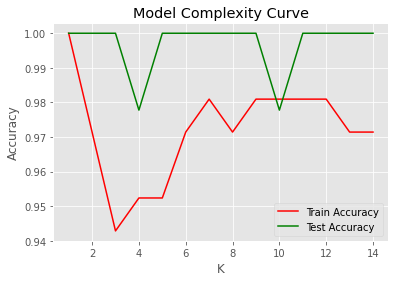

In [14]:
iris_train_acc = []
iris_test_acc = []
for i in range(1, 15):
    knn_iris = KNeighborsClassifier(n_neighbors=i)
    knn_iris.fit(X_train_iris, y_train_iris)
    
    pred_train = knn_iris.predict(X_train_iris)
    pred_test = knn_iris.predict(X_test_iris)
    
    iris_train_acc.append(accuracy_score(y_train_iris, pred_train))
    iris_test_acc.append(accuracy_score(y_test_iris, pred_test))
    
plt.plot(list(range(1, 15)), iris_train_acc, label = 'Train Accuracy', color = 'red')
plt.plot(list(range(1, 15)), iris_test_acc, label = 'Test Accuracy', color = 'green')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Model Complexity Curve')
plt.legend()
plt.show()

It seems like k = 3 would be perfect for iris data.

# Module 2. Regression
In the previous chapter, you used image and political datasets to predict binary and multiclass outcomes. But what if your problem requires a continuous outcome? Regression is best suited to solving such problems. You will learn about fundamental concepts in regression and apply them to predict the life expectancy in a given country using Gapminder data.

1. An e-commerce company using labeled customer data to predict whether or not a customer will purchase a particular item.**Classification**
2. A healthcare company using data about cancer tumors (such as their geometric measurements) to predict whether a new tumor is benign or malignant.**Classification**
3. A restaurant using review data to ascribe positive or negative sentiment to a given review.**Classification**
4. A bike share company using time and weather data to predict the number of bikes being rented at any given hour.**Regression**

In [15]:
boston = pd.read_csv("./datasets/boston.txt")
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
# Creating feature and target arrays
X_boston = boston.drop("MEDV", axis = 1).values
y_boston = boston['MEDV'].values

In [17]:
X_rooms = X_boston[:, 5]
type(X_rooms), type(y_boston)

(numpy.ndarray, numpy.ndarray)

In [18]:
# Reshape the data
y_boston = y_boston.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

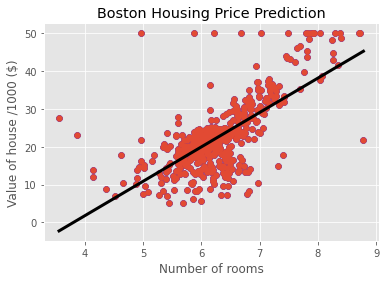

In [19]:
lr_boston = LinearRegression()
lr_boston.fit(X_rooms, y_boston)
prediction_space = np.linspace(min(X_rooms), max(X_rooms))

plt.scatter(X_rooms, y_boston, color = 'blue')
plt.plot(prediction_space, lr_boston.predict(prediction_space), color='black', linewidth=3)
plt.scatter(X_rooms, y_boston)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.title("Boston Housing Price Prediction")
plt.show()

### The basics of linear regression
* y = ax + b
* y = target
* x = single feature
* a, b = parameters of model

How do we choose a and b?
* Define an error functions for any given line
* Choose the line that minimizes the error function

**Ordinary least squares(OLS):** Minimize sum of squares of residuals

In [20]:
# Split the data into train and test
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston,
                                                                                           random_state = 10, test_size = 0.25)

# Fit the model
lr_boston = LinearRegression()
lr_boston.fit(X_train_boston, y_train_boston)

# Predict
y_pred = lr_boston.predict(X_test_boston)
print("R squared value: ", lr_boston.score(X_test_boston, y_test_boston))

R squared value:  0.6745585065949429


R Squared valued quantifies the amount of variance in target variable explained by predictor variables.

### Note
The value of R square depends on the train test split, if there is some pecularity in the dataset then the R Squared valued may not be representative. One potential solution of this problem is using Cross Validation

### Cross Validation

In [21]:
cv_results = cross_val_score(LinearRegression(), X_boston, y_boston, cv = 5)
print("The R Squared value is {} +/- {}".format(cv_results.mean(), cv_results.std()))

The R Squared value is 0.35327592439588124 +/- 0.37656783933261945


### Regularized regression
* Large coefficients can lead to overing, Penalizing large coefficients is called Regularization.

#### Ridge regression
Loss function = $\sum_{i=1}^N\Big\{ y_i - \sum_{j=0}^M \beta_j x_{ij}\Big\}^2 + \lambda \sum_{j=0}^M w_j^2$

* Alpha: Parameter we need to choose
* Picking alpha here is similar to picking k in k-NN
* Alpha controls model complexity
    * Alpha = 0: We get back OLS (Can lead to overing)
    * Very high alpha: Can lead to undering

In [22]:
ridge_boston = Ridge(alpha = 0.1, normalize = True)
ridge_boston.fit(X_train_boston, y_train_boston)

print("R squared value: ", ridge_boston.score(X_test_boston, y_test_boston))

R squared value:  0.6641740931561723


#### Lasso regression
Loss function = $\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$

Lasso regression for feature selection
* Can be used to select important features of a dataset
* Shrinks the coecients of less important features to exactly 0
* This is also known as  regularization because the regularization term is the  norm of the coefficients.

R squared value:  0.5488355077725984


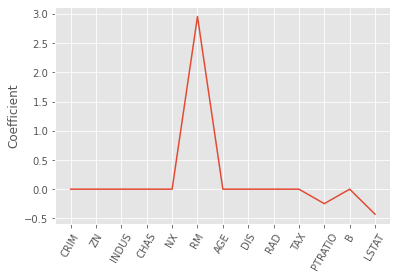

In [23]:
lasso_boston = Lasso(alpha = 0.1, normalize = True)
lasso_boston.fit(X_train_boston, y_train_boston)

print("R squared value: ", lasso_boston.score(X_test_boston, y_test_boston))

# Feature Selection
features = boston.drop("MEDV", axis = 1).columns
lasso_boston_coef = Lasso(alpha = 0.1, normalize = True).fit(X_boston, y_boston).coef_

plt.plot(range(len(features)), lasso_boston_coef)
plt.xticks(range(len(features)), features, rotation = 60)
plt.ylabel("Coefficient")

plt.show()

It seems number of rooms is the most important features in determining the price of home.

## Module 3. Fine-tuning your model
Having trained your model, your next task is to evaluate its performance. In this chapter, you will learn about some of the other metrics available in scikit-learn that will allow you to assess your model's performance in a more nuanced manner. Next, learn to optimize your classification and regression models using hyperparameter tuning.

### Metrics from the confusion matrix
* Precision = TP / TP + FP
* Recall = TP / TP + FN
* F1score: Harmonic mean of precision and recall
* **High precision: Not many real emails predicted as spam**
* **High recall: Predicted most spam emails correctly**

In [24]:
# Performance metrics on iris dataset
print(confusion_matrix(y_test_iris, y_pred_iris))
print(classification_report(y_test_iris, y_pred_iris))

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Logistic regression for binary classification
* Logistic regression outputs probabilities
    * If the probability ‘p’ is greater than 0.5, the data is labeled ‘1’
    * If the probability ‘p’ is less than 0.5, the data is labeled ‘0’
* Linear decision boundary
* By default, logistic regression threshold = 0.5

In [78]:
# Fit and Predict 
log_reg_iris = LogisticRegression()
log_reg_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = log_reg_iris.predict(X_test_iris)
y_pred_proba_iris = log_reg_iris.predict_proba(X_test_iris)[:, 1]
print("Accuracy on Iris Dataset using Logistic Regression: ", accuracy_score(y_test_iris, y_pred_iris))

Accuracy on Iris Dataset using Logistic Regression:  1.0


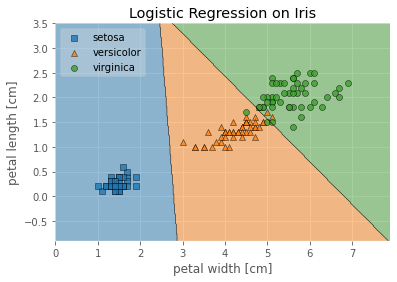

In [72]:
# Training a classifier
log_reg_diabetes = LogisticRegression()
log_reg_diabetes.fit(X_petal, y_iris)


# Plotting decision regions
ax = plot_decision_regions(X_petal, y_iris, clf=log_reg_diabetes, legend=0)

# Adding axes annotations
plt.xlabel('petal width [cm]')
plt.ylabel('petal length [cm]')
plt.title('Logistic Regression on Iris')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['setosa', 'versicolor', 'virginica'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

### Hyperparameter tuning
* Hyperparameter are the parameters which can't be learn by data

#### Choosing the correct hyperparameter
* Try a bunch of different hyperparameter values
* Fit all of them separately
* See how well each performs
* Choose the best performing one
* It is essential to use cross-validation

In [101]:
from sklearn.model_selection import GridSearchCV

param_grid_iris = {'n_neighbors': np.arange(1, 50)}
knn_iris = KNeighborsClassifier()
knn_cv_iris = GridSearchCV(knn_iris, param_grid_iris, cv=5)
knn_cv_iris.fit(X_iris, y_iris)
knn_cv_iris.best_params_

{'n_neighbors': 6}

In [104]:
# best accuracy with n_neighbor = 6
knn_cv_iris.best_score_

0.9800000000000001

## Module 4. Preprocessing and pipelines
This chapter introduces pipelines, and how scikit-learn allows for transformers and estimators to be chained together and used as a single unit. Preprocessing techniques will be introduced as a way to enhance model performance, and pipelines will tie together concepts from previous chapters.
#### Preprocessing data

In [118]:
auto = pd.read_csv("./datasets/auto.txt")
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


Dealing with categorical features
* Scikit-learn will not accept categorical features by default
* Need to encode categorical features numerically
* Convert to ‘dummy variables’
    * 0: Observation was NOT that category
    * 1: Observation was that category

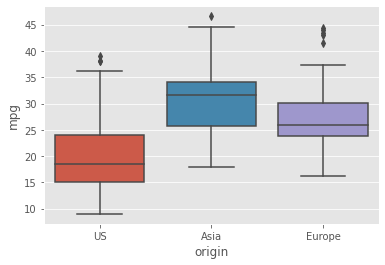

In [120]:
sns.boxplot(x = "origin", y = "mpg", data = auto)
plt.show()

Seems Asian cars have got maximum mileage.

In [124]:
# Encoding dummy variables
auto = pd.get_dummies(auto, drop_first = True)
auto.head()

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


### Wine Dataset

In [185]:
wine = pd.read_csv("./datasets/white-wine.txt")
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [187]:
# Create features and targer
X_wine = wine.drop("quality", axis = 1)
y_wine = wine['quality']

# Scale the features: X_scaled
X_wine_scaled = scale(X_wine)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(X_wine.mean())) 
print("Standard Deviation of Unscaled Features: {}".format(X_wine.std()))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(X_wine_scaled.mean())) 
print("Standard Deviation of Scaled Features: {}".format(X_wine_scaled.std()))

Mean of Unscaled Features: fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
dtype: float64
Standard Deviation of Unscaled Features: fixed acidity            0.843868
volatile acidity         0.100795
citric acid              0.121020
residual sugar           5.072058
chlorides                0.021848
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.151001
sulphates                0.114126
alcohol                  1.230621
dtype: float64
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999


In [189]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline_wine = Pipeline(steps)

# Create train and test sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, random_state = 42, test_size = 0.3 )

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline_wine.fit(X_train_wine, y_train_wine)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train_wine, y_train_wine)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test_wine, y_test_wine)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test_wine, y_test_wine)))

Accuracy with Scaling: 0.5496598639455782
Accuracy without Scaling: 0.47551020408163264


## Exercise 1

In [25]:
votes = pd.read_csv("datasets/house-votes-84.txt", header = None)
votes.columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador','religious', 'satellite', 'aid', 'missile', 
                 'immigration', 'synfuels','education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
votes.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [26]:
# Replace '?' by NaN
votes.replace('?', np.nan, inplace = True)

In [27]:
# check missing values
votes.isnull().sum()

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64

In [28]:
# Impute missing value by mode
for col in votes.columns:
    votes[col].fillna(votes[col].mode()[0], inplace = True)

# Replace n -> 0 and y -> 1
votes.replace({'n': 0, 'y': 1}, inplace = True)
votes.replace({'republican': 0, 'democrat': 1}, inplace = True)
votes.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,1,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [29]:
# dataset dimension
votes.shape

(435, 17)

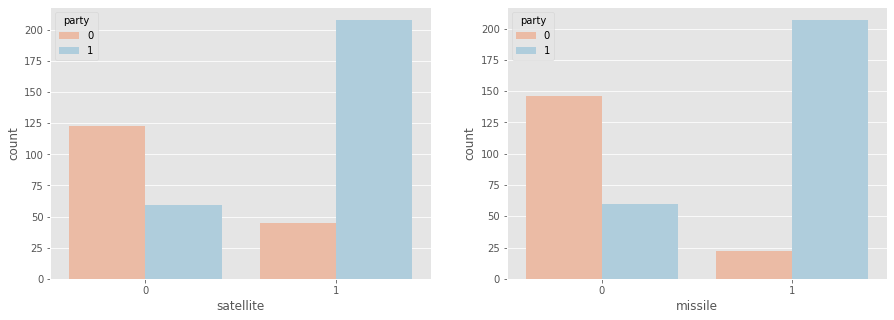

In [30]:
# countplot

fig = plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x = 'satellite', hue = 'party', data = votes, palette = 'RdBu')

plt.subplot(1, 2, 2)
sns.countplot(x = 'missile', hue = 'party', data = votes, palette = 'RdBu')

plt.show()

Democrats voted in favor of both 'satellite' and 'missile'

In [31]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y_votes = votes['party'].values
X_votes = votes.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn_votes = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn_votes.fit(X_votes, y_votes)


# Predict the labels for the training data X
y_pred_votes = knn_votes.predict(X_votes)

print("Accuracy: ", accuracy_score(y_votes, y_pred_votes) * 100)

Accuracy:  93.79310344827586


### MNIST Digit Dataset

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

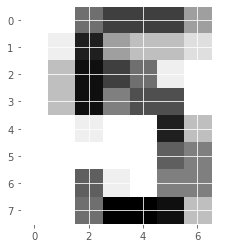

In [32]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits["DESCR"])

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [33]:
# Create feature and target arrays
X_digits = digits['data']
y_digits = digits['target']

# Split into training and test set
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size = 0.2, 
                                                                                random_state=42, stratify=y_digits)

# Create a k-NN classifier with 7 neighbors: knn
knn_digits = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn_digits.fit(X_train_digits, y_train_digits)

# Print the accuracy
print("Accuracy on MNIST DIGIT Datset: ", knn_digits.score(X_test_digits, y_test_digits))

Accuracy on MNIST DIGIT Datset:  0.9833333333333333


### Overfitting and underfitting

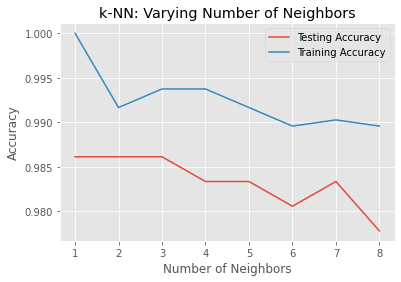

In [34]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn_digits = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn_digits.fit(X_train_digits, y_train_digits)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn_digits.score(X_train_digits, y_train_digits)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn_digits.score(X_test_digits, y_test_digits)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

It looks like the test accuracy is highest when using 2 and 3 neighbors.

## Exercise - 2. Regression

In [35]:
# Read the CSV file into a DataFrame: df
gapminder = pd.read_csv("./datasets/gm_2008_region.txt")

# Dimension
print("Dimension: ", gapminder.shape)

# Create arrays for features and target variable
y_gapminder = gapminder["life"].values
X_fertility = gapminder["fertility"].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y_gapminder.shape))
print("Dimensions of X before reshaping: {}".format(X_fertility.shape))

# Reshape X and y
y_gapminder = y_gapminder.reshape(-1, 1)
X_fertility = X_fertility.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y_gapminder.shape))
print("Dimensions of X after reshaping: {}".format(X_fertility.shape))


Dimension:  (139, 10)
Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [36]:
# Describe the dataset
gapminder.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


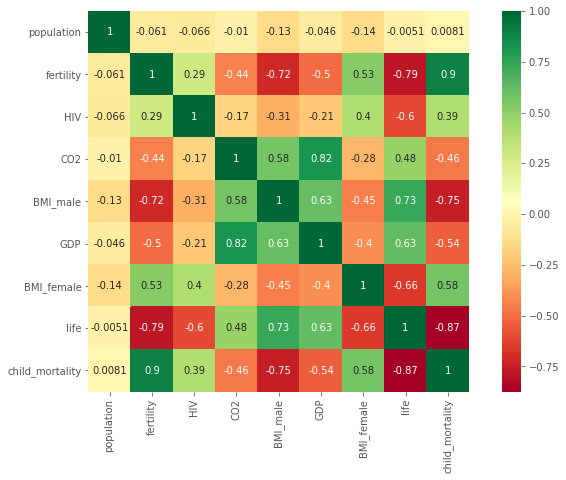

In [37]:
# Heatmap
plt.figure(figsize = (12, 7))
sns.heatmap(gapminder.corr(), square=True, cmap='RdYlGn', annot = True)
plt.show()

* life and fertility are negatively correlated.
* The mean of life is 69.602878.
* GDP and life are positively correlated.

0.6192442167740035


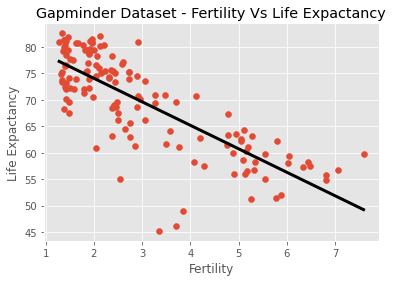

In [38]:
X_gapminder = gapminder.drop(["life", "Region"], axis = 1)

# Split the data into train and test
X_train_gapminder, X_test_gapminder, y_train_gapminder, y_test_gapminder = train_test_split(X_gapminder, y_gapminder,
                                                                                           random_state = 10, test_size = 0.25)


# Create the regressor: reg
reg_gapminder = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg_gapminder.fit(X_fertility, y_gapminder)

# Compute predictions over the prediction space: y_pred
y_pred_gapminder = reg_gapminder.predict(prediction_space)

# Print R^2 
print(reg_gapminder.score(X_fertility, y_gapminder))

# Plot regression line
plt.scatter(X_fertility, y_gapminder)
plt.xlabel("Fertility")
plt.ylabel("Life Expactancy")
plt.title("Gapminder Dataset - Fertility Vs Life Expactancy")
plt.plot(prediction_space, y_pred_gapminder, color='black', linewidth=3)
plt.show()

#### Using all Data

In [39]:
# Create the regressor: reg_all
reg_all_gapminder = LinearRegression()

# Fit the regressor to the training data
reg_all_gapminder.fit(X_train_gapminder, y_train_gapminder)

# Predict on the test data: y_pred
y_pred_gapminder = reg_all_gapminder.predict(X_test_gapminder)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all_gapminder.score(X_test_gapminder, y_test_gapminder)))
rmse = np.sqrt(mean_squared_error(y_test_gapminder, y_pred_gapminder))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8507725530715824
Root Mean Squared Error: 3.528490048836692


Using all features has improved the model score. This makes sense, as the model has more information to learn from

## Cross Validation

In [40]:
# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_gapminder, y_gapminder, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793507


#### K-Fold CV comparison

In [41]:
# Perform 3-fold CV
%timeit cross_val_score(reg, X_gapminder, y_gapminder, cv = 3)

33.2 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
# # Perform 10-fold CV
%timeit cross_val_score(reg, X_gapminder, y_gapminder, cv = 10)

107 ms ± 6.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Lasso Regression for Feature Selection

In [43]:
X_gapminder.columns.values

array(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'], dtype=object)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


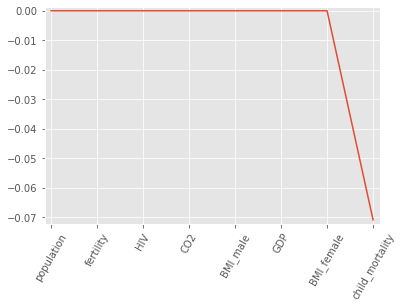

In [44]:
# Instantiate a lasso regressor: lasso
lasso_gapminder = Lasso(alpha = 0.4, normalize = True)

# Fit the regressor to the data
lasso_gapminder.fit(X_gapminder, y_gapminder)

# Compute and print the coefficients
lasso_gapminder_coef = lasso_gapminder.coef_
print(lasso_gapminder_coef)

# Plot the coefficients
plt.plot(range(len(X_gapminder.columns)), lasso_gapminder_coef)
plt.xticks(range(len(X_gapminder.columns)), X_gapminder.columns.values, rotation=60)
plt.margins(0.02)
plt.show()


According to the lasso algorithm, it seems like 'child_mortality'

### Ridge Regression

In [111]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

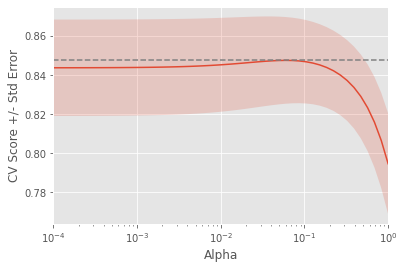

In [46]:
# Find the optimal value of alpha

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X_gapminder, y_gapminder, cv = 10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


It seems alpha = 0.1 would be the best value for gapminder dataset.

#### Elastic Net Regression
There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties: a * L1 + b * L2



In [115]:
# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train_gapminder, y_train_gapminder)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test_gapminder)
r2 = gm_cv.score(X_test_gapminder, y_test_gapminder)
mse = mean_squared_error(y_test_gapminder, y_pred_gapminder)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8357148827765088
Tuned ElasticNet MSE: 12.450242024739563


## Exercise 3. Fine-tuning your model

In [47]:
diabetes = pd.read_csv("./datasets/diabetes.txt")
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
# Create feature and target
X_diabetes = diabetes.drop("diabetes", axis = 1).values
y_diabetes = diabetes['diabetes'].values

# Create training and test set
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, 
                                                                                        random_state = 42, test_size = 0.4)

# Instantiate a k-NN classifier: knn
knn_diabetes = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the training data
knn_diabetes.fit(X_train_diabetes, y_train_diabetes)

# Predict the labels of the test data: y_pred
y_pred_diabetes = knn_diabetes.predict(X_test_diabetes)

# TP, TN, FP, FN
diabetes_df = pd.DataFrame({"ground_truth": y_test_diabetes, "model_prediction": y_pred_diabetes})
tp = diabetes_df[(diabetes_df['ground_truth'] == 1) & (diabetes_df['model_prediction'] == 1)]
tn = diabetes_df[(diabetes_df['ground_truth'] == 0) & (diabetes_df['model_prediction'] == 0)]
fp = diabetes_df[(diabetes_df['ground_truth'] == 0) & (diabetes_df['model_prediction'] == 1)]
fn = diabetes_df[(diabetes_df['ground_truth'] == 1) & (diabetes_df['model_prediction'] == 0)]

print("TP count: ", tp.shape[0])
print("TN count: ", tn.shape[0])
print("FP count: ", fp.shape[0])
print("FN count: ", fn.shape[0])

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test_diabetes, y_pred_diabetes))
print(classification_report(y_test_diabetes, y_pred_diabetes))

TP count:  46
TN count:  176
FP count:  30
FN count:  56
[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



#### Using Logistic Regression

In [98]:
from sklearn.metrics import roc_auc_score

Accuracy on Iris Dataset using Logistic Regression:  0.7662337662337663
AUC:  0.8260517799352751


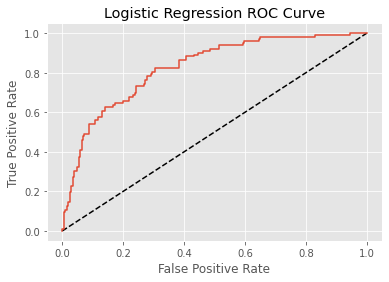

In [100]:
# Fit and Predict 
log_reg_diabetes = LogisticRegression()
log_reg_diabetes.fit(X_train_diabetes, y_train_diabetes)
y_pred_diabetes = log_reg_diabetes.predict(X_test_diabetes)
y_pred_proba_diabetes = log_reg_diabetes.predict_proba(X_test_diabetes)[:, 1]
print("Accuracy on Iris Dataset using Logistic Regression: ", accuracy_score(y_test_diabetes, y_pred_diabetes))
print("AUC: ", roc_auc_score(y_test_diabetes, y_pred_proba_diabetes))

fpr, tpr, threshold = roc_curve(y_test_diabetes, y_pred_proba_diabetes)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

* Larger the area under ROC curve, the more better would be the model.
* If the AUC is greater than 0.5, the model is better than random guessing.

### Precision Recall Curve

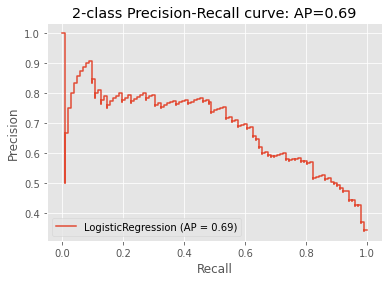

In [95]:
y_score_diabetes = log_reg_diabetes.decision_function(X_test_diabetes)

average_precision = average_precision_score(y_test_diabetes, y_score_diabetes)

disp = plot_precision_recall_curve(log_reg_diabetes, X_test_diabetes, y_test_diabetes)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

* A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.
* Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes.
* When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.

### Hyperparameter tuning
#### Grid Search CV
* Logistic Regression has a parameter - C which is called inverse of the regularization strength.
* A large C can lead to an overfit model, while a small C can lead to an underfit model.

In [108]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space,
             'penalty': ['l1', 'l2']}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_train_diabetes, y_train_diabetes)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 2275.845926074791, 'penalty': 'l2'}
Best score is 0.7760869565217391


#### Hyperparameter tuning with RandomizedSearchCV
GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [107]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train_diabetes, y_train_diabetes)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 5}
Best score is 0.7413043478260869


RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time.

For which of the following reasons would you want to use a hold-out set for the very end?
1. You want to maximize the amount of training data used.
2. You want to be absolutely certain about your model's ability to generalize to unseen data.**True**

## Exercise 4. Preprocessing

In [125]:
gapminder

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa


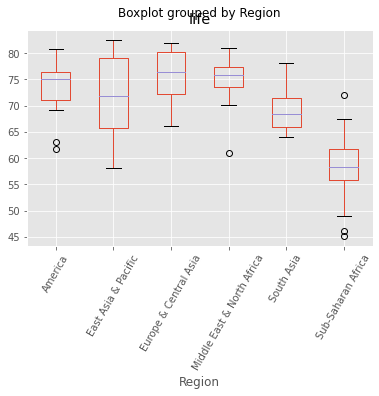

In [126]:
# Create a boxplot of life expectancy per region
gapminder.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

### Regression with categorical features

In [128]:
# Create feature and target
gapminder = pd.get_dummies(gapminder, drop_first = True)
X_gapminder, y_gapminder = gapminder.drop('life', axis = 1), gapminder['life']

# Instantiate a ridge regressor: ridge
ridge_gapminder = Ridge(alpha = 0.5, normalize = True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X_gapminder, y_gapminder, cv = 5)

# Print the cross-validated scores
print(ridge_cv)

[0.87769018 0.77837349 0.80177186 0.76752597 0.83467473]


### Handling missing data

In [131]:
diabetes

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [158]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

In [132]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [160]:
# Create predictors and target
X_diabetes = diabetes.drop("diabetes", axis = 1)
y_diabetes = diabetes['diabetes']

imp = SimpleImputer(missing_values = 0, strategy='mean')
svm = SVC()

# Preprocessing steps
steps = [('imputation', imp),
        ('SVM', svm)]

pipeline_diabetes = Pipeline(steps)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size = 0.3,
                                                                                       random_state = 42, stratify = y_diabetes)
# fit the data
pipeline_diabetes.fit(X_train_diabetes.values, y_train_diabetes.values)
y_pred_diabetes = pipleline_diabetes.predict(X_test_diabetes)

# performance metrics
print("Accuracy: ", pipeline_diabetes.score(X_test_diabetes, y_test_diabetes))

# Compute metrics
print(classification_report(y_test_diabetes, y_pred_diabetes))

Accuracy:  0.7445887445887446
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       150
           1       0.65      0.49      0.56        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



### Everything Together !!
#### Classification

In [193]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, 
                                                                                        test_size = 0.2, random_state = 21)

# Instantiate the GridSearchCV object: cv
cv_diabetes = GridSearchCV(pipeline, parameters, cv = 3)

# Fit to the training set
cv_diabetes.fit(X_train_diabetes, y_train_diabetes)

# Predict the labels of the test set: y_pred
y_pred_diabetes = cv_diabetes.predict(X_test_diabetes)

# Compute and print metrics
print("Accuracy: {}".format(cv_diabetes.score(X_test_diabetes, y_test_diabetes)))
print(classification_report(y_test_diabetes, y_pred_diabetes))
print("Tuned Model Parameters: {}".format(cv_diabetes.best_params_))


Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        94
           1       0.78      0.52      0.62        60

    accuracy                           0.75       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.75      0.74       154

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}


#### Regression

In [199]:
X_train_gapminder.isnull().sum()

population                           0
fertility                            0
HIV                                  0
CO2                                  0
BMI_male                             0
GDP                                  0
BMI_female                           0
child_mortality                      0
Region_East Asia & Pacific           0
Region_Europe & Central Asia         0
Region_Middle East & North Africa    0
Region_South Asia                    0
Region_Sub-Saharan Africa            0
dtype: int64

In [207]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline_gapminder = Pipeline(steps)

# Specify the hyperparameter space
parameters_gapminder = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train_gapminder, X_test_gapminder, y_train_gapminder, y_test_gapminder = train_test_split(X_gapminder, y_gapminder, test_size = 0.4, random_state = 42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline_gapminder, parameters_gapminder, cv = 3)

# Fit to the training set
gm_cv.fit(X_train_gapminder, y_train_gapminder)

# Compute and print the metrics
r2 = gm_cv.score(X_test_gapminder, y_test_gapminder)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016549771035
